In [14]:
import pandas as pd

# Загрузка даних
dataframe = pd.read_csv('icecreamreviews.csv', delimiter=',', encoding='latin1')

# Видалення нульових значень
dataframe = dataframe.dropna()

# Вивід даних
dataframe

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,5,Iâm OBSESSED with this pint!,3,0,I decided to try it out although Iâm not a h...
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream Iâve ever ...
...,...,...,...,...,...,...,...,...
7938,56_bj,Shellyshellzs,2020-04-30,5,Peanut butter fudge heaven,0,0,Oh man I use to be a whatever was on sale girl...
7939,56_bj,Or1234,2020-02-24,5,The best Chocolate Ice Cream Combo,0,0,This is the first chocolate ice cream Iâve t...
7940,56_bj,ava21,2020-01-31,5,PERFECT!!,0,0,This is the best pint of ice cream I've ever h...
7941,56_bj,yeee,2019-03-13,5,My favorite!,0,0,This is my favorite ice cream ever! Can't get ...


In [15]:
data = dataframe['text'][:1000]

data

0       Super good, don't get me wrong. But I came for...
1       I decided to try it out although Iâm not a h...
2       My caramel core begins to disappear about half...
3       Why are people complaining about the blonde br...
4       This ice cream is worst ice cream Iâve ever ...
                              ...                        
1024    Literally my favorite flavor. The waffle cone ...
1025    So perfect!!!!!! The caramel swirl is amazing!...
1026    Beauty, brains, and brawn. Chocolate, caramel,...
1027    This is one of the most delicious flavors of i...
1028    I'm new to B&J icecream, just got a whole bunc...
Name: text, Length: 1000, dtype: object

In [16]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re

# Нормалізація тексту

# Метод для видалення пунктуації
def remove_punctuation(text):
    return text.apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Видалення пунктуації з тексту
data = remove_punctuation(data)

# Функція для токенізації
def tokenize_text(text):
    return text.apply(lambda x: word_tokenize(x))

# Токенізація тексту
data = tokenize_text(data)

data

0       [Super, good, dont, get, me, wrong, But, I, ca...
1       [I, decided, to, try, it, out, although, Iâm, ...
2       [My, caramel, core, begins, to, disappear, abo...
3       [Why, are, people, complaining, about, the, bl...
4       [This, ice, cream, is, worst, ice, cream, Iâve...
                              ...                        
1024    [Literally, my, favorite, flavor, The, waffle,...
1025      [So, perfect, The, caramel, swirl, is, amazing]
1026    [Beauty, brains, and, brawn, Chocolate, carame...
1027    [This, is, one, of, the, most, delicious, flav...
1028    [Im, new, to, BJ, icecream, just, got, a, whol...
Name: text, Length: 1000, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# З'єднання токенів у рядки
text_joined = [' '.join(tokens) for tokens in data]

# Перетворення тексту у числовий вектор за допомогою TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_joined)

In [21]:
from sklearn.cluster import KMeans

# Кластеризація з допомогою K means
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Отримання міток кластерів для кожного тексту
cluster_labels = kmeans.labels_

In [29]:
from textblob import TextBlob

data_for_polarity = dataframe['text'][:1000]

# Створення списку для збереження значень polarity
polarity_values = []

# Отримання показників polarity для кожного тексту
for text in data_for_polarity:
    analysis = TextBlob(text)
    polarity_values.append(analysis.sentiment.polarity)

polarity_values

[0.2760942760942761,
 0.06460084033613445,
 0.037003968253968254,
 0.22403846153846155,
 -0.08809523809523809,
 -0.21428571428571425,
 0.011080586080586085,
 0.31015625,
 0.18526785714285715,
 0.0625,
 -0.19027777777777777,
 0.20000000000000004,
 -0.09,
 0.1396103896103896,
 0.08437499999999999,
 0.41590909090909095,
 0.26993055555555556,
 0.2945238095238096,
 0.192053872053872,
 0.26666666666666666,
 0.29869791666666673,
 -0.019444444444444448,
 0.30277777777777776,
 -1.0,
 0.5,
 0.12068452380952381,
 0.17291666666666666,
 0.10500000000000001,
 0.5,
 -0.130859375,
 -0.13214285714285715,
 -0.0625,
 0.1854166666666667,
 0.061580086580086554,
 0.2722946859903382,
 0.30520833333333336,
 0.18055555555555555,
 0.25,
 0.4654761904761905,
 0.26375000000000004,
 0.45,
 0.39999999999999997,
 0.09375,
 0.008333333333333304,
 0.22000000000000003,
 -0.3333333333333333,
 0.25833333333333336,
 0.08008658008658012,
 -0.06666666666666667,
 0.05333333333333334,
 -0.06,
 0.04184981684981685,
 0.18749999

In [30]:
data_for_subjectivity = dataframe['text']

# Функція для отримання показників subjectivity
def get_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

# Отримання значень subjectivity для кожного тексту
subjectivity_values = data_for_subjectivity.apply(get_subjectivity)

# Виведення значень subjectivity
subjectivity_values

0       0.592989
1       0.289146
2       0.349603
3       0.459615
4       0.549490
          ...   
7938    0.667857
7939    0.544444
7940    0.450000
7941    0.750000
7942    0.770000
Name: text, Length: 5204, dtype: float64

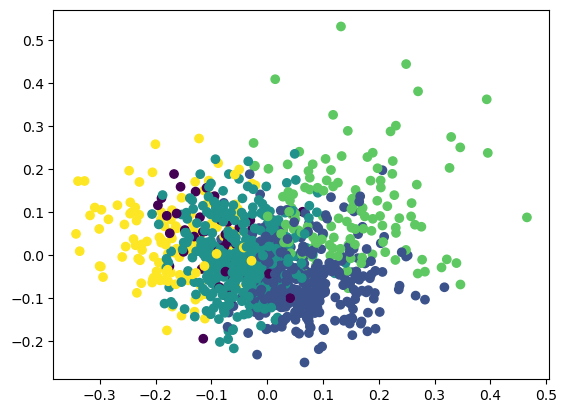

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Зменшення розмірності до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Візуалізація результату виконання алгоритму K-means у двовимірному просторі
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

# Оцінка якості кластерів K-means

# Оцінка суми квадратів відстаней в кластерах
inertia = kmeans.inertia_
print(f"Чим ближче значення до 0 - тим краща кластеризація")
print(f"Inertia: {inertia}")

# Оцінка коефіцієнта силуету
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"")
print(f"Чим ближче значення до 1 - тим краща кластеризація, чим ближче до -1 - тим гірша")
print(f"Silhouette Score: {silhouette_avg}")

Чим ближче значення до 0 - тим краща кластеризація
Inertia: 896.7950663653322

Чим ближче значення до 1 - тим краща кластеризація, чим ближче до -1 - тим гірша
Silhouette Score: 0.006418505466988863


In [41]:
from nltk.tag import pos_tag
from itertools import chain

# Розгортання списку списків слів у один загальний список слів
all_words = list(chain.from_iterable(data))

# Частиномовне тегування (Part-of-Speech Tagging)
tagged_words = pos_tag(all_words)

# Виділення іменників
nouns = [word for word, tag in tagged_words if tag == 'NN']
print(nouns)

['dont', 'caramel', 'cream', 'packaging', 'taste', 'ratio', 'brownie', 'cream', 'package', 'one', 'ratio', 'chewy', 'flavor', 'texture', 'idea', 'caramelsweet', 'cream', 'brownie', 'caramel', 'fan', 'buy', 'didnât', 'caramel', 'reason', 'pint', 'middle', 'reason', 'point', 'one', 'brownie', 'chunk', 'bite', 'caramel', 'didnât', 'liking', 'pint', 'week', 'pint', 'cus', 'sick', 'happiness', 'caramel', 'core', 'way', 'caramel', 'time', 'caramel', 'core', 'well', 'pint', 'caramel', 'way', 'way', 'favor', 'care', 'caramel', 'pint', 'pint', 'choice', 'caramel', 'core', 'reason', 'caramel', 'flow', 'core', 'blonde', 'blonde', 'cream', 'fudge', 'blonde', 'ice', 'cream', 'stock', 'none', 'caramel', 'ratio', 'ice', 'cream', 'ice', 'cream', 'today', 'couldnât', 'wait', 'home', 'cream', 'ice', 'cream', 'flavour', 'fine', 'caramel', 'core', 'disgusting', 'itâs', 'cream', 'point', 'caramel', 'level', 'case', 'mine', 'batch', 'night', 'cake', 'salty', 'flavor', 'caramel', 'core', 'ice', 'cream', 'sal

In [45]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# Підготовка тексту
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(doc) for doc in data]

# Пошук оптимальної кількості тем
coherence_values = []
model_list = []
for num_topics in range(2, 12):
    model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=data, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# Знаходження найкращого числа тем
optimal_num_topics = range(2, 12)[coherence_values.index(max(coherence_values))]
print(f"Оптимальна кількість тем: {optimal_num_topics}")

Оптимальна кількість тем: 4


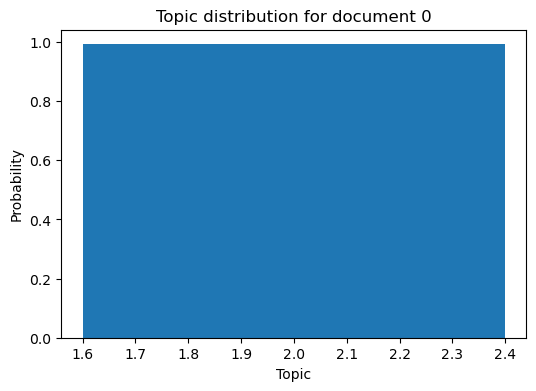

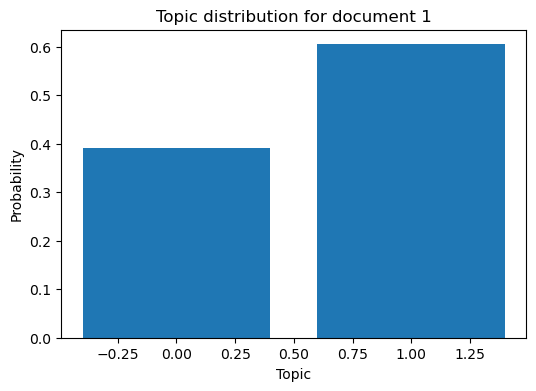

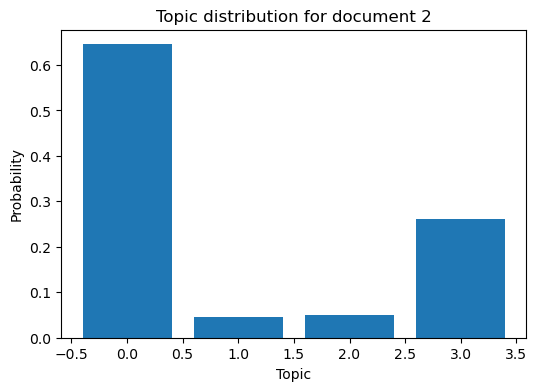

In [50]:
import matplotlib.pyplot as plt

# Отримання розподілу тем у текстах
topic_distribution = []
for doc in corpus:
    topic_distribution.append(model_list[optimal_num_topics - 2].get_document_topics(doc))

# Побудова графіку розподілу тем для перших трьох текстів
for i, topic in enumerate(topic_distribution[:3]):
    topics, probs = zip(*topic)
    plt.figure(figsize=(6, 4))
    plt.bar(topics, probs)
    plt.xlabel('Topic')
    plt.ylabel('Probability')
    plt.title(f'Topic distribution for document {i}')
    plt.show()